In [25]:
# Delay Analysis
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
PATH_FILE_DELAY_COMPONENTS = "delay_analysis.csv"
PATH_FILE_UAT_EXPERIMENT = "uat_experiment.csv"

In [26]:
# Open file
df_delay_components = pd.read_csv(PATH_FILE_DELAY_COMPONENTS)
df_delay_components.head()

,event_id,unit_parent_number,window_ts,window_cloud_ingestion_ts,expected_job_start_ts,expected_job_end_ts,actual_job_start_ts,feature_generation_ts,event_ts,actual_job_end_ts,...,class_name,total_delay,expected_total_delay,cloud_ingestion_delay,expected_job_delay,buffer_delay,feature_job_delay,event_job_delay,publication_delay,class_delay
0,57fe789c-92b4-4585-8de1-e47cf0496c40,620436,2023-09-14 07:50:00.000000 UTC,2023-09-14 07:50:17.000000 UTC,2023-09-14 08:05:03.715819 UTC,2023-09-14 08:07:00.715359 UTC,2023-09-14 08:45:02.679315 UTC,2023-09-14 08:45:40.793894 UTC,2023-09-14 08:46:30.062108 UTC,2023-09-14 08:46:41.814404 UTC,...,Engine_Erratic_RPM,3390,1020.0,17.0,886.0,2398.0,38,49,11,buffer_issue
1,fb842abf-80d4-4347-8274-f1617e1505d8,620892,2023-08-22 22:45:00.000000 UTC,2023-08-22 22:45:13.000000 UTC,2023-08-22 23:05:03.780519 UTC,2023-08-22 23:06:55.225883 UTC,2023-08-22 23:45:02.589307 UTC,2023-08-22 23:45:45.249489 UTC,2023-08-22 23:47:01.952010 UTC,2023-08-22 23:47:08.596030 UTC,...,Engine_Erratic_RPM,3721,1315.0,13.0,1190.0,2398.0,42,76,6,buffer_issue
2,9688ce8e-fb30-4b00-ba74-623ffb4f5089,621180,2023-09-14 18:00:00.000000 UTC,2023-09-14 18:00:43.000000 UTC,2023-09-14 18:05:03.691429 UTC,2023-09-14 18:06:41.588729 UTC,2023-09-14 18:45:02.641615 UTC,2023-09-14 18:45:39.059630 UTC,2023-09-14 18:46:35.029331 UTC,2023-09-14 18:46:43.418740 UTC,...,Engine_Erratic_RPM,2795,401.0,43.0,260.0,2398.0,36,55,8,buffer_issue
3,64b21f49-f901-43c8-a71b-c9e7f1453402,621211,2023-09-06 07:30:00.000000 UTC,2023-09-06 07:30:31.000000 UTC,2023-09-06 20:45:03.360418 UTC,2023-09-06 20:46:32.019640 UTC,2023-09-06 08:25:03.502636 UTC,2023-09-06 08:26:12.033608 UTC,2023-09-06 08:27:42.718698 UTC,2023-09-06 08:27:50.256357 UTC,...,Engine_Erratic_RPM,3462,47792.0,31.0,47672.0,-44399.0,68,90,7,cloud_ingestion_issue
4,64b21f49-f901-43c8-a71b-c9e7f1453402,621211,2023-09-06 07:30:00.000000 UTC,2023-09-06 20:25:48.000000 UTC,2023-09-06 20:45:03.360418 UTC,2023-09-06 20:46:32.019640 UTC,2023-09-06 08:25:03.502636 UTC,2023-09-06 08:26:12.033608 UTC,2023-09-06 08:27:42.718698 UTC,2023-09-06 08:27:50.256357 UTC,...,Engine_Erratic_RPM,3462,47792.0,46548.0,1155.0,-44399.0,68,90,7,cloud_ingestion_issue


In [27]:
df_delay_components.class_delay.unique()

array(['buffer_issue', 'cloud_ingestion_issue', 'expected_behaviour'],
      dtype=object)

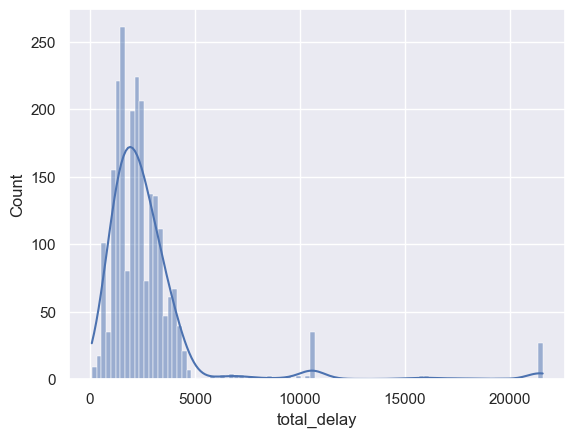

In [28]:
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df_delay_components,
             x="total_delay", kde=True)
plt.show()

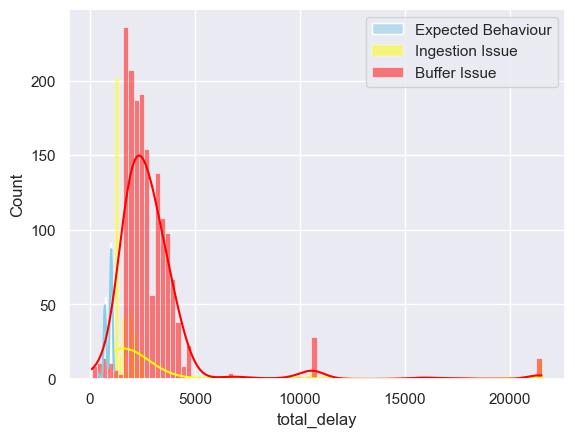

In [29]:
sns.histplot(data=df_delay_components[df_delay_components.class_delay == "expected_behaviour"],
             x="total_delay", color="skyblue", label = "Expected Behaviour", kde=True)
sns.histplot(data=df_delay_components[df_delay_components.class_delay == "cloud_ingestion_issue"],
             x="total_delay", color="yellow", label = "Ingestion Issue", kde=True)
sns.histplot(data=df_delay_components[df_delay_components.class_delay == "buffer_issue"],
             x="total_delay", color="red", label = "Buffer Issue", kde=True)


plt.legend() 
plt.show()

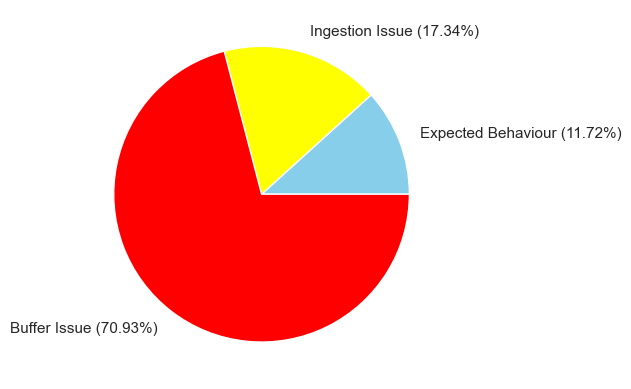

In [30]:
# create random data
labels = ['Expected Behaviour', 'Ingestion Issue', 'Buffer Issue']
colors = ["skyblue", "yellow", "red"]
values = values=[df_delay_components[df_delay_components.class_delay == "expected_behaviour"].shape[0]/df_delay_components.shape[0],
        df_delay_components[df_delay_components.class_delay == "cloud_ingestion_issue"].shape[0]/df_delay_components.shape[0],
        df_delay_components[df_delay_components.class_delay == "buffer_issue"].shape[0]/df_delay_components.shape[0]]

values = [round(x, 4) for x in values]

labels = [f"{labels[i]} ({100*values[i]}%)" for i in range(3)]

# Create a pieplot
plt.pie(values)

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels = labels, labeldistance = 1.15, colors=colors);
plt.show();

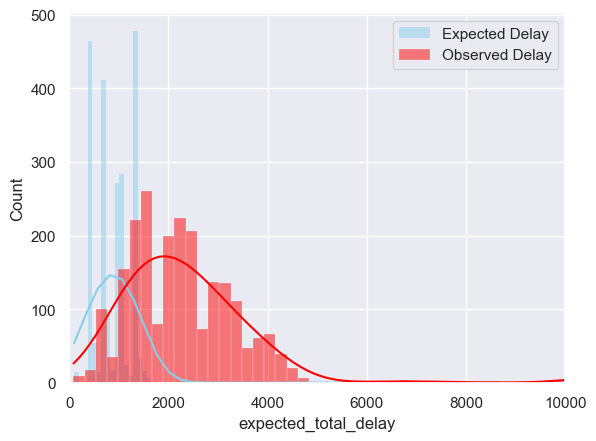

In [31]:
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df_delay_components,
             x="expected_total_delay", color="skyblue", label = "Expected Delay", kde=True)
sns.histplot(data=df_delay_components,
             x="total_delay", color="red", label = "Observed Delay", kde=True)
plt.xlim(0, 10000)
plt.legend()
plt.show()

In [32]:
print(df_delay_components.total_delay.mean()/60)
print(df_delay_components.expected_total_delay.mean()/60)

45.11197376009227
17.87227393617021


In [33]:
# Open experiment file
df_uat_experiment = pd.read_csv(PATH_FILE_UAT_EXPERIMENT)
df_uat_experiment.head()

,window_ts,unit_parent_number,uat_event_ts,prod_event_ts,uat_delay,prod_delay,delay_improvement
0,2023-10-11 00:20:00.000000 UTC,199186,2023-10-11 00:25:05.963803 UTC,2023-10-11 01:06:51.782592 UTC,305,2811,0
1,2023-10-11 01:15:00.000000 UTC,199186,2023-10-11 01:24:47.740684 UTC,2023-10-11 01:56:54.952723 UTC,587,2514,0
2,2023-10-11 13:15:00.000000 UTC,621003,2023-10-11 13:24:28.124878 UTC,2023-10-11 13:36:52.485333 UTC,568,1312,0
3,2023-10-11 12:40:00.000000 UTC,621003,2023-10-11 12:44:30.758147 UTC,2023-10-11 13:36:52.485333 UTC,270,3412,0
4,2023-10-11 12:55:00.000000 UTC,621003,2023-10-11 13:04:50.629265 UTC,2023-10-11 13:56:45.698474 UTC,590,3705,0


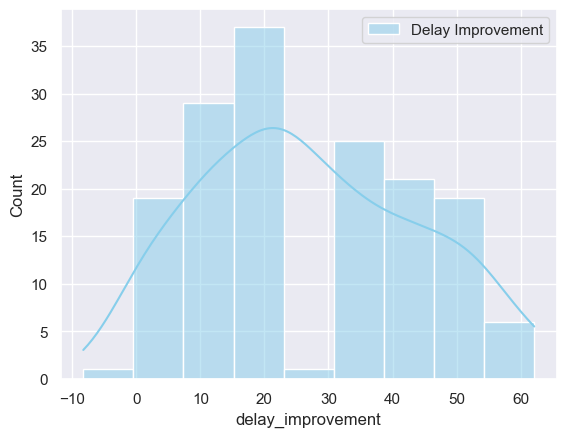

In [40]:
# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

df_uat_experiment["delay_improvement"] = (df_uat_experiment["prod_delay"] - df_uat_experiment["uat_delay"])/60

sns.set(style="darkgrid")

sns.histplot(data=df_uat_experiment,
             x="delay_improvement", color="skyblue", label = "Delay Improvement", kde=True)
#plt.xlim(0, 4000)
plt.legend()
plt.show()

In [41]:
print(df_uat_experiment.prod_delay.mean()/60)
print(df_uat_experiment.uat_delay.mean()/60)
print(df_uat_experiment.delay_improvement.mean())

34.25854430379747
7.357700421940929
26.900843881856545
